In [2]:
# Tres importante! Use venv_reliability to run les codes!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.mixture import GaussianMixture

from reliability.Fitters import *
from reliability.Distributions import Weibull_Distribution
from reliability.Other_functions import histogram
import tikzplotlib

In [3]:
# Load data
data_fname = "../data/common_conditions_breed_data.csv"
data = pd.read_csv(data_fname)
data = data.sample(n=200000, random_state=1)

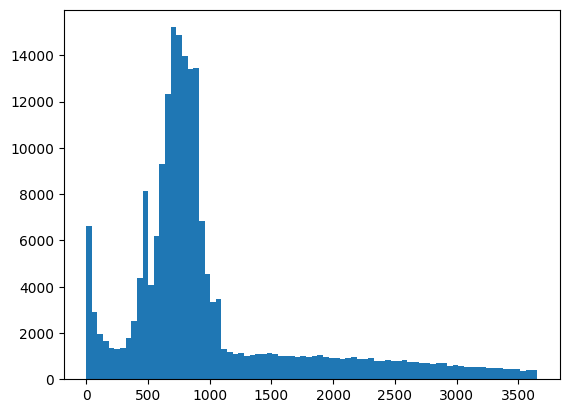

In [4]:
days_alive = data["days_alive"]
plt.hist(days_alive.to_numpy(), bins=80)
plt.show()

TV = 1.4622594071988793% (i.e., by taking a Weibull this is max. error in )


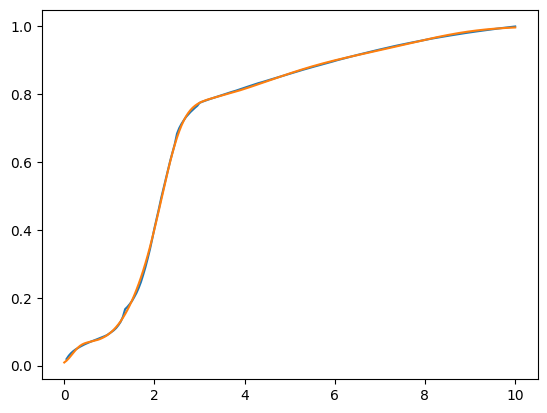

In [5]:
# data_no_left_peak = data[~((data["Abattoir_._Died_on_Farm"] == "Died on Farm") 
#                      & (data["Total_Conditions_per_Animal"] == 0) )]["days_alive"].to_numpy().reshape(-1, 1) / 365
data_no_left_peak = data["days_alive"].to_numpy().reshape(-1, 1) / 365

# Compute error [Total variation distance between estimated Weibull and empirical distribution]
H, X1 = np.histogram(data_no_left_peak, bins=200, density=True)
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx

# plt.hist(data_no_left_peak,
#         density=True,
#         bins=100,
#         label="Histogram",
#         alpha=0.4)
num_comp = 5
g = GaussianMixture(n_components = num_comp,
                    max_iter=1000,
                    random_state=0,
                    covariance_type='full').fit(data_no_left_peak)

weights = g.weights_
means = g.means_
covars = g.covariances_
x_plot = np.linspace(0, 10, 10000)[:, np.newaxis]
y = weights[0]*stats.norm.pdf(X1, means[0], np.sqrt(covars[0])).ravel()
ycdf = weights[0]*stats.norm.cdf(X1, means[0], np.sqrt(covars[0])).ravel()

for i in range(1, num_comp):
    y = y + weights[i]*stats.norm.pdf(X1, means[i], np.sqrt(covars[i])).ravel()
    ycdf = ycdf + weights[i]*stats.norm.cdf(X1, means[i], np.sqrt(covars[i])).ravel()
# plt.plot(X1, y, label=f"Gaussian mixture, k={num_comp}")

# plt.legend()
# plt.xlabel('Age (years)')
# plt.ylabel('Density (emp./KDE)')
# plt.show()

# TV gaussian


## Compare (x1, f1) with (x_plot, y)
tv_error = np.amax(np.abs(F1 - ycdf[1:]))
print(f"TV = {100*tv_error}% (i.e., by taking a Weibull this is max. error in )")

plt.plot(X1[1:],F1)
plt.plot(X1,ycdf)

Results from Fit_Weibull_Mixture (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 31139/0 (0% right censored) 

   Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
     Alpha 1        0.421185      0.00901132  0.403889  0.439223
      Beta 1        0.809892      0.00734885  0.795616  0.824424
     Alpha 2         5.60687       0.0406755   5.52771   5.68716
      Beta 2         2.28947       0.0326622   2.22634   2.35439
Proportion 1        0.583566      0.00507344  0.573589  0.593474 

Goodness of fit    Value
 Log-likelihood -49586.5
           AICc    99183
            BIC  99224.7
             AD  21.0975 



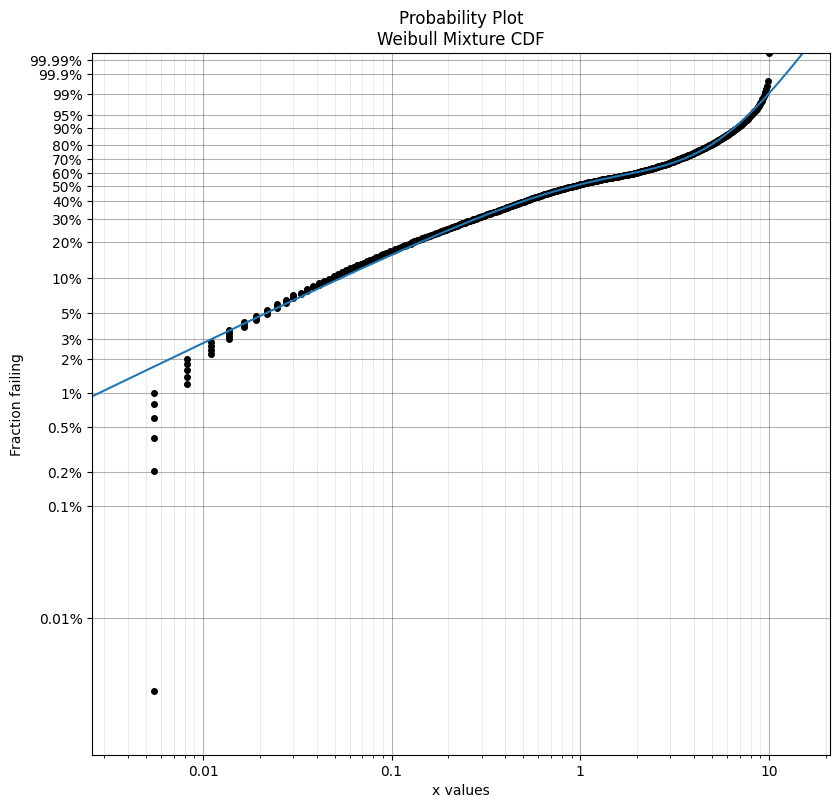

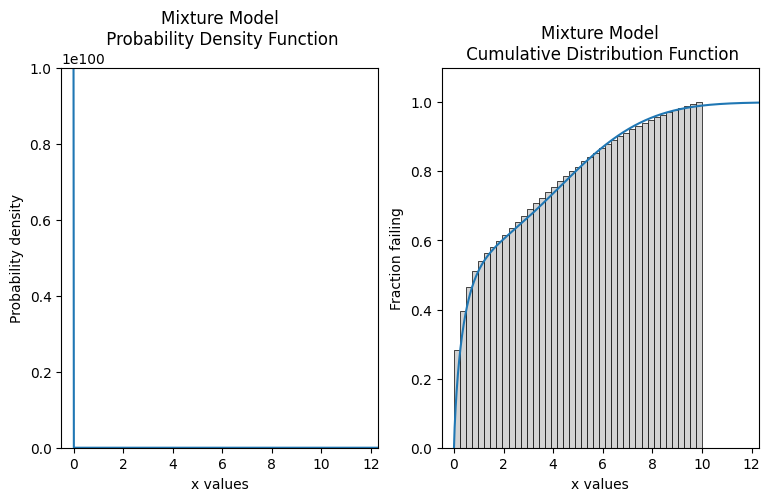

In [6]:
data_no_left_peak = data[((data["Abattoir_._Died_on_Farm"] == "Died on Farm")  
                     & (data["Total_Conditions_per_Animal"] == 0) )  & (data["days_alive"] > 1)  ]["days_alive"].to_numpy() / 365
results = Fit_Weibull_Mixture(failures=data_no_left_peak)


# this section is to visualise the histogram with PDF and CDF
# it is not part of the default output from the Fitter
plt.figure(figsize=(9, 5))
plt.subplot(121)
histogram(data_no_left_peak)
results.distribution.PDF()
plt.subplot(122)
histogram(data_no_left_peak, cumulative=True)
results.distribution.CDF()

plt.show()

Results from Fit_Weibull_Mixture (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 168267/0 (0% right censored) 

   Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
     Alpha 1         2.19159      0.00140961   2.18883   2.19436
      Beta 1         5.04449       0.0134002    5.0183   5.07082
     Alpha 2         6.19441       0.0181425   6.15896   6.23007
      Beta 2         2.74044        0.019442   2.70259   2.77881
Proportion 1         0.76617      0.00138692  0.763441  0.768877 

Goodness of fit   Value
 Log-likelihood -237189
           AICc  474387
            BIC  474438
             AD 86.2761 

TV = 2.3767684502230364% (i.e., by taking a Weibull this is max. error in )


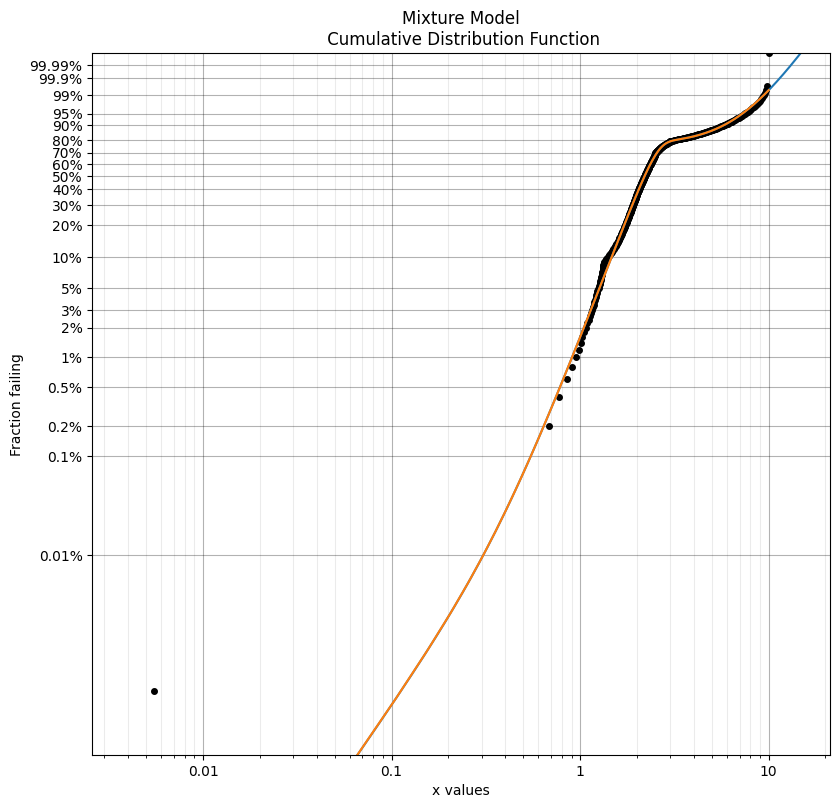

In [7]:
data_leme = data[~((data["Abattoir_._Died_on_Farm"] == "Died on Farm")  
                     & (data["Total_Conditions_per_Animal"] == 0) )  & (data["days_alive"] > 1)  ]["days_alive"].to_numpy() / 365
results = Fit_Weibull_Mixture(failures=data_leme)


# Compute error [Total variation distance between estimated Weibull and empirical distribution]
H, X1 = np.histogram(data_leme, bins=200, density=True)
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx

cdf_weib = results.distribution.CDF(xvals=X1)
tv_error = np.amax(np.abs(F1 - cdf_weib[1:]))
print(f"TV = {100*tv_error}% (i.e., by taking a Weibull this is max. error in )")

In [53]:
data_fname = "../data/common_conditions_breed_data.csv"
data = pd.read_csv(data_fname)

In [83]:
import tikzplotlib
def tikzplotlib_fix_ncols(obj):
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

In [113]:
sliceB = data[~((data["Abattoir_._Died_on_Farm"] == "Died on Farm") 
                     & (data["days_alive"] >= 1) 
                     & (data["Total_Conditions_per_Animal"] == 0) )]["days_alive"].to_numpy() / 365.
sliceA = data[((data["Abattoir_._Died_on_Farm"] == "Died on Farm") 
                     & (data["days_alive"] >= 1) 
                     & (data["Total_Conditions_per_Animal"] == 0) )]["days_alive"].to_numpy() / 365.

In [114]:
results = Fit_Weibull_Mixture(failures=sliceB, show_probability_plot=False)
h, bins = np.histogram(sliceB, bins=200, density=True)
cdfz = results.distribution.CDF(xvals=bins, show_plot=False)

Results from Fit_Weibull_Mixture (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: L-BFGS-B
Failures / Right censored: 1542557/0 (0% right censored) 

   Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
     Alpha 1         2.19106     0.000464521   2.19015   2.19197
      Beta 1         5.02902      0.00440902   5.02038   5.03767
     Alpha 2         6.20462      0.00607705   6.19272   6.21654
      Beta 2         2.74131      0.00654378   2.72852   2.75417
Proportion 1        0.769639     0.000456419  0.768743  0.770533 

Goodness of fit        Value
 Log-likelihood -2.16644e+06
           AICc  4.33288e+06
            BIC  4.33294e+06
             AD      819.089 



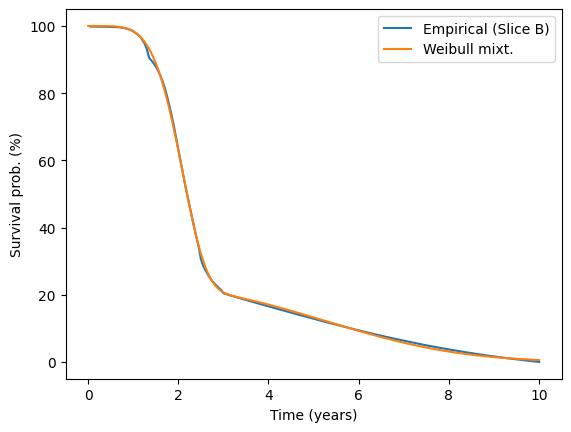

In [115]:
fig = plt.figure()
plt.plot(bins[1:], 100*(1-(bins[1] - bins[0])*np.cumsum(h)), label="Empirical (Slice B)")
plt.plot(bins, 100*(1-cdfz), label='Weibull mixt.')
plt.xlabel('Time (years)')
plt.ylabel('Survival prob. (%)')
plt.legend()
tikzplotlib_fix_ncols(fig)
tikzplotlib.save("./images/weibull_mixture_slice_B.tex")

In [87]:
results_slice_A = Fit_Weibull_Mixture(failures=sliceA, show_probability_plot=False)
h_slice_A, bins_slice_A = np.histogram(sliceA, bins=200, density=True)
cdfz_slice_A = results_slice_A.distribution.CDF(xvals=bins_slice_A, show_plot=False)

Results from Fit_Weibull_Mixture (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 284778/0 (0% right censored) 

   Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
     Alpha 1        0.419632      0.00298351  0.413825   0.42552
      Beta 1        0.810326      0.00244948  0.805539  0.815141
     Alpha 2         5.60356       0.0131819   5.57778   5.62945
      Beta 2         2.29846       0.0106925    2.2776   2.31952
Proportion 1        0.577262      0.00166965  0.573987  0.580531 

Goodness of fit   Value
 Log-likelihood -456887
           AICc  913784
            BIC  913837
             AD 188.734 



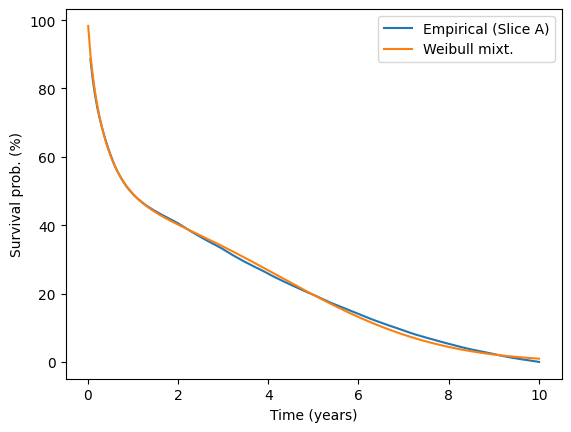

In [88]:
fig_slice_A = plt.figure()
empirical_surv_slice_A = 100*(1-(bins_slice_A[1] - bins_slice_A[0])*np.cumsum(h_slice_A))
two_weibull_surv_slice_A = 100*(1-cdfz_slice_A)
ks_dist = np.max(np.abs(empirical_surv_slice_A - two_weibull_surv_slice_A))
plt.plot(bins_slice_A[1:], empirical_cdf_slice_A, label="Empirical (Slice A)")
plt.plot(bins_slice_A, two_weibull_surv_slice_A, label='Weibull mixt.')
plt.xlabel('Time (years)')
plt.ylabel('Survival prob. (%)')
plt.legend()
tikzplotlib_fix_ncols(fig_slice_A)
tikzplotlib.save("./images/weibull_mixture_slice_A.tex")

In [138]:
sliceA_male = data[~((data["Abattoir_._Died_on_Farm"] == "Died on Farm") 
                     & (data["days_alive"] >= 1) 
                     & (data["Total_Conditions_per_Animal"] == 0)                      
                   ) & (data["Sex"] == "B") ]["days_alive"].to_numpy() / 365.

print(f"Slice A (MALE): {sliceA_male.shape[0]} members")

results_slice_A_male = Fit_Weibull_Mixture(failures=sliceA_male, show_probability_plot=False)
h_slice_A_male, bins_slice_A_male = np.histogram(sliceA_male, bins=200, density=True)
cdfz_slice_A_male = results_slice_A_male.distribution.CDF(xvals=bins_slice_A_male, show_plot=False)

Slice A (MALE): 34068 members
Results from Fit_Weibull_Mixture (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 33893/0 (0% right censored) 

   Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
     Alpha 1         1.85461      0.00469305   1.84544   1.86383
      Beta 1         3.46134       0.0208924   3.42063   3.50253
     Alpha 2         5.51729       0.0430847   5.43349   5.60238
      Beta 2          2.3584       0.0337356    2.2932   2.42546
Proportion 1        0.719505      0.00401824  0.711562  0.727312 

Goodness of fit    Value
 Log-likelihood -52638.6
           AICc   105287
            BIC   105329
             AD  307.139 



KS dist: 10.282803924790116


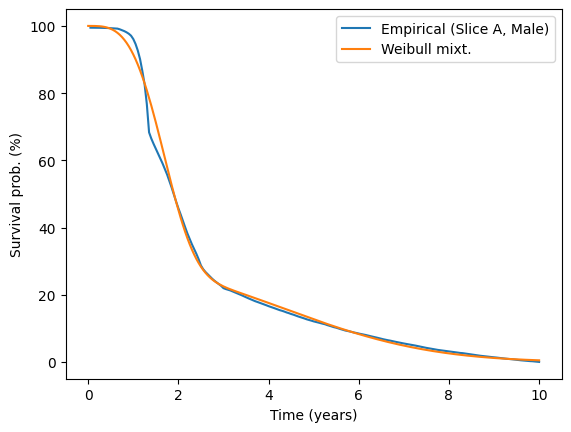

In [139]:
fig_slice_A_male = plt.figure()
empirical_surv_slice_A_male = 100*(1-(bins_slice_A_male[1] - bins_slice_A_male[0])*np.cumsum(h_slice_A_male))
two_weibull_surv_slice_A_male = 100*(1-cdfz_slice_A_male)
ks_dist_slice_A_male = np.max(np.abs(empirical_surv_slice_A_male - two_weibull_surv_slice_A_male[1:]))
print(f"KS dist: {ks_dist_slice_A_male}")
plt.plot(bins_slice_A_male[1:], 100*(1-(bins_slice_A_male[1] - bins_slice_A_male[0])*np.cumsum(h_slice_A_male)), label="Empirical (Slice A, Male)")
plt.plot(bins_slice_A_male, 100*(1-cdfz_slice_A_male), label='Weibull mixt.')
plt.xlabel('Time (years)')
plt.ylabel('Survival prob. (%)')
plt.legend()
tikzplotlib_fix_ncols(fig_slice_A_male)
# tikzplotlib.save("./images/weibull_mixture_slice_A_male.tex")

In [101]:
bins_slice_A_male

array([5.47945205e-03, 5.34794521e-02, 1.01479452e-01, 1.49479452e-01,
       1.97479452e-01, 2.45479452e-01, 2.93479452e-01, 3.41479452e-01,
       3.89479452e-01, 4.37479452e-01, 4.85479452e-01, 5.33479452e-01,
       5.81479452e-01, 6.29479452e-01, 6.77479452e-01, 7.25479452e-01,
       7.73479452e-01, 8.21479452e-01, 8.69479452e-01, 9.17479452e-01,
       9.65479452e-01, 1.01347945e+00, 1.06147945e+00, 1.10947945e+00,
       1.15747945e+00, 1.20547945e+00, 1.25347945e+00, 1.30147945e+00,
       1.34947945e+00, 1.39747945e+00, 1.44547945e+00, 1.49347945e+00,
       1.54147945e+00, 1.58947945e+00, 1.63747945e+00, 1.68547945e+00,
       1.73347945e+00, 1.78147945e+00, 1.82947945e+00, 1.87747945e+00,
       1.92547945e+00, 1.97347945e+00, 2.02147945e+00, 2.06947945e+00,
       2.11747945e+00, 2.16547945e+00, 2.21347945e+00, 2.26147945e+00,
       2.30947945e+00, 2.35747945e+00, 2.40547945e+00, 2.45347945e+00,
       2.50147945e+00, 2.54947945e+00, 2.59747945e+00, 2.64547945e+00,
      

# 